## Introduction: Business Analysis of Sales Data
In this analysis, we will explore the sales performance of various products across different regions, retailers, and sales methods. Our objective is to address key business questions that are critical for making informed decisions, optimizing sales strategies, and understanding consumer behavior. By conducting a series of statistical tests and comparisons, we aim to answer the following business questions:

<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/Adidas-US-Sales-Analysis/main/Adidas%20US%20Sales%20Dataset.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


<br>

## General Sales Analysis

### 1. What is the total revenue generated across all retailers?

In [4]:
df['Total Sales'].sum()

899902125.0

The total sales amount to **$899,902,125 USD**. This significant figure reflects the overall performance across all product categories, regions, retailers, and sales methods.

<br>


### 2. Which retailer contributes the most to total sales revenue?

In [5]:
df.groupby('Retailer')['Total Sales'].sum()

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64

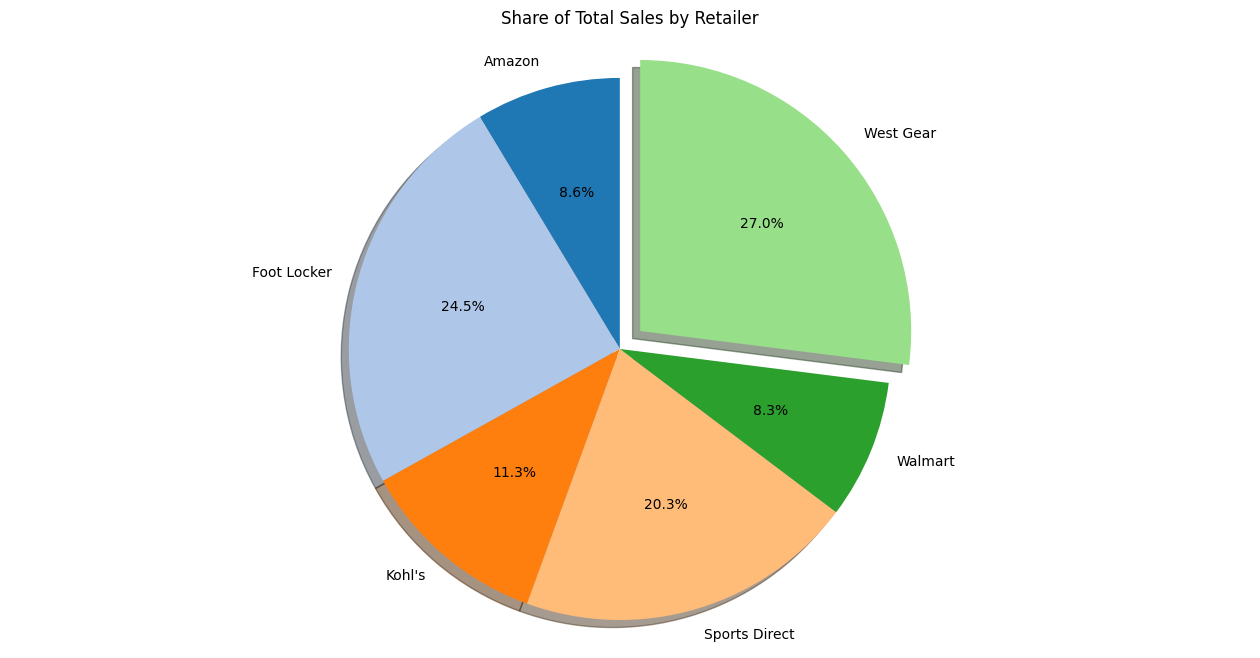

In [6]:
total_sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
explode_index = total_sales_by_retailer.idxmax()
explode = [0.1 if retailer == explode_index else 0 for retailer in total_sales_by_retailer.index]
colors = plt.get_cmap('tab20').colors
ax.pie(total_sales_by_retailer, labels=total_sales_by_retailer.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=colors[:len(total_sales_by_retailer)])
ax.axis('equal')
ax.set_title('Share of Total Sales by Retailer')
plt.show()

In the total revenue from the sale of Adidas products in the analyzed dataset, the largest share belongs to the retailer **West Gear** with a total of **$242,964,333 USD** which represents **27%** of the total sales.

<br>


### 3. What is the average sales revenue?

In [8]:
df['Total Sales'].mean()

93273.4375

The average revenue in the Adidas sales dataset stands at an impressive **$93,273.43 USD**.

<br>


### 4. How does the number of units sold vary by region?

In [12]:
df.groupby('Region')['Units Sold'].sum()

Region
Midwest      391337
Northeast    501279
South        492260
Southeast    407000
West         686985
Name: Units Sold, dtype: int64

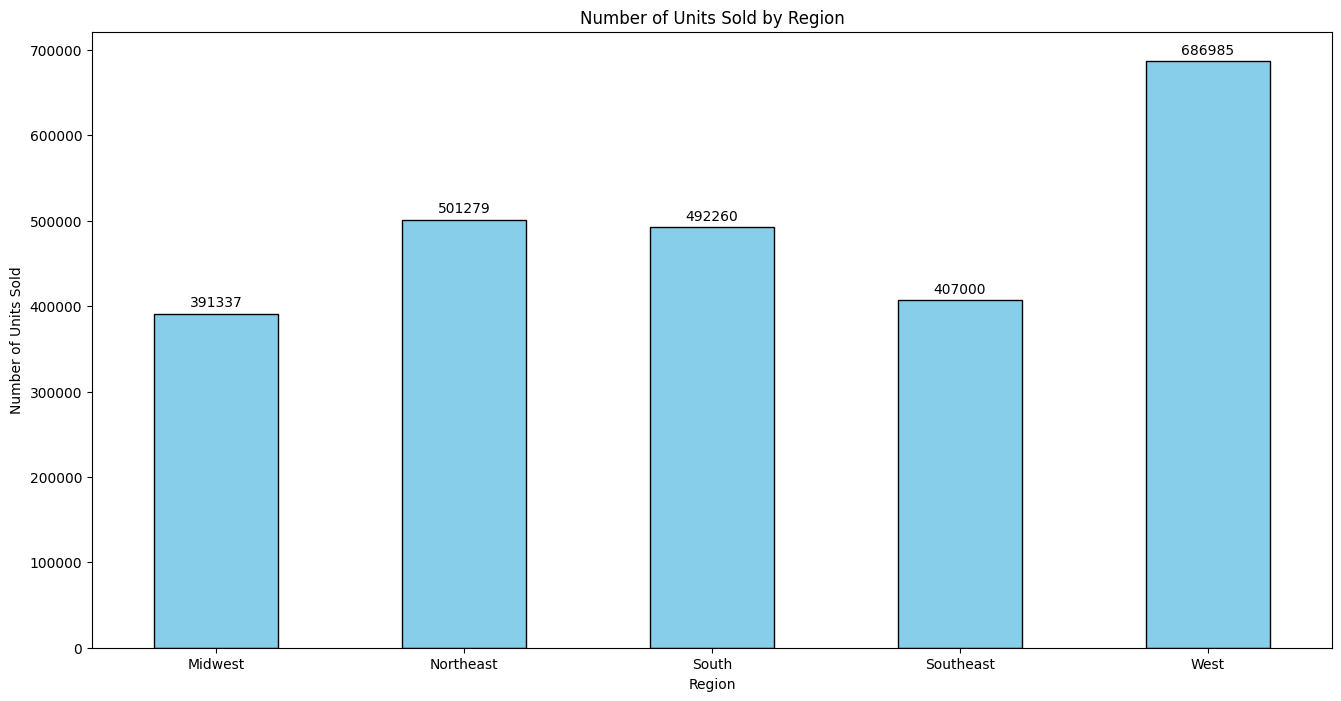

In [13]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Number of Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The number of units sold varies significantly by region. The **West** leads with **686 985** units sold, demonstrating the highest demand in that area. The **Northeast** follows with **501 279** units sold, and the **South** is close behind with **492 260** units. The **Southeast** shows slightly lower sales, with **407 000** units sold, while the **Midwest** has the smallest share, with **391 337** units sold. These figures indicate that sales are highest in the Western region, while the Midwest experiences relatively lower demand.

<br>


### 5. Which city generates the highest total sales?

In [19]:
df.groupby('City')['Total Sales'].sum().nlargest(1)

City
Charleston    39974797.0
Name: Total Sales, dtype: float64

Among the cities listed, **Charleston** generates the highest total sales, amounting to **$39 974 797**. This figure highlights Charleston as the leading city in terms of total sales performance.

<br>


### 6. How many unique retailers are present in the dataset?

In [22]:
df['Retailer'].nunique()

6

There are **6 unique retailers** present in the dataset.

<br>

### 7. What is the most sold product category by volume?

In [32]:
def split_product(product):
    parts = product.split("'", 1)
    return parts[0].strip(), parts[1].strip() if len(parts) > 1 else ''

In [35]:
df[['Gender', 'Category']] = df['Product'].apply(lambda x: pd.Series(split_product(x)))
df['Category'] = df['Category'].str.lstrip('s ').str.strip()

In [38]:
df.groupby('Category')['Units Sold'].sum()

Category
Apparel              740510
Athletic Footwear    752762
Street Footwear      985589
Name: Units Sold, dtype: int64

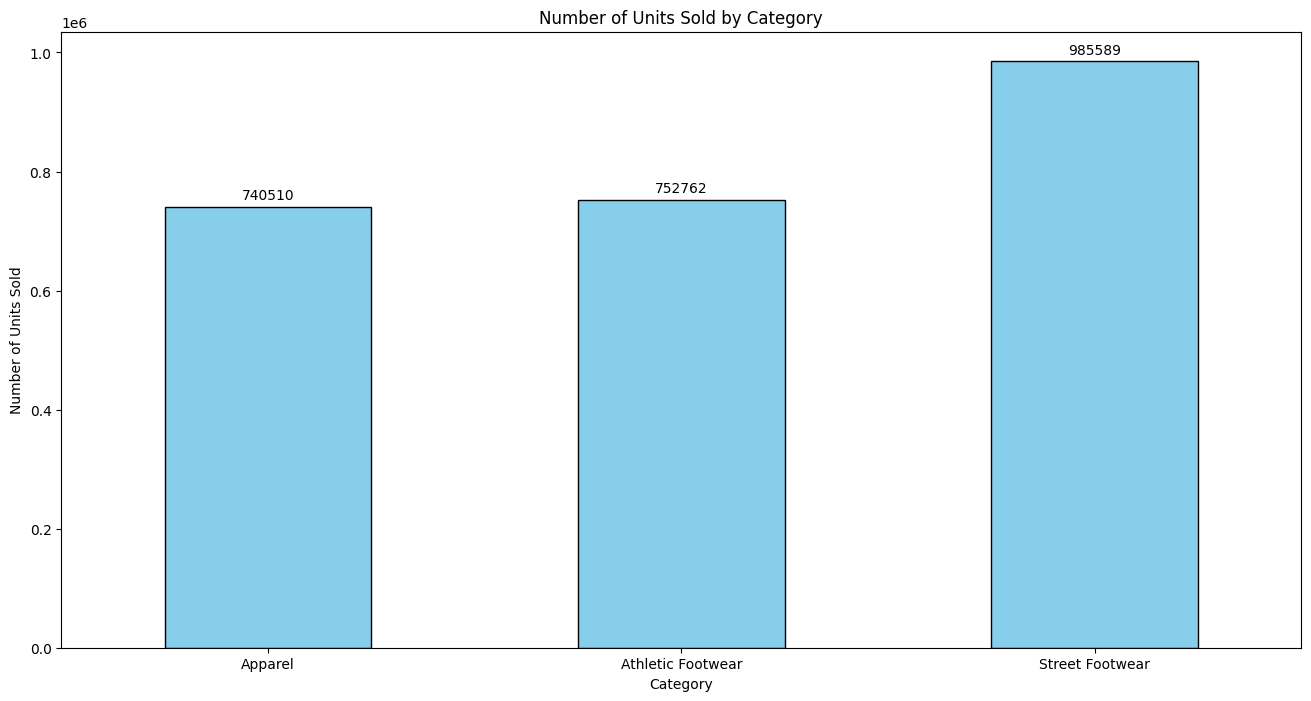

In [39]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Number of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The most sold product category by volume is **Street Footwear**, with a total of **985 589** units sold. This category leads in sales volume compared to Apparel and Athletic Footwear.

<br>


### 8. What is the total sales revenue for each region?

In [41]:
df.groupby('Region')['Total Sales'].sum()

Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: Total Sales, dtype: float64

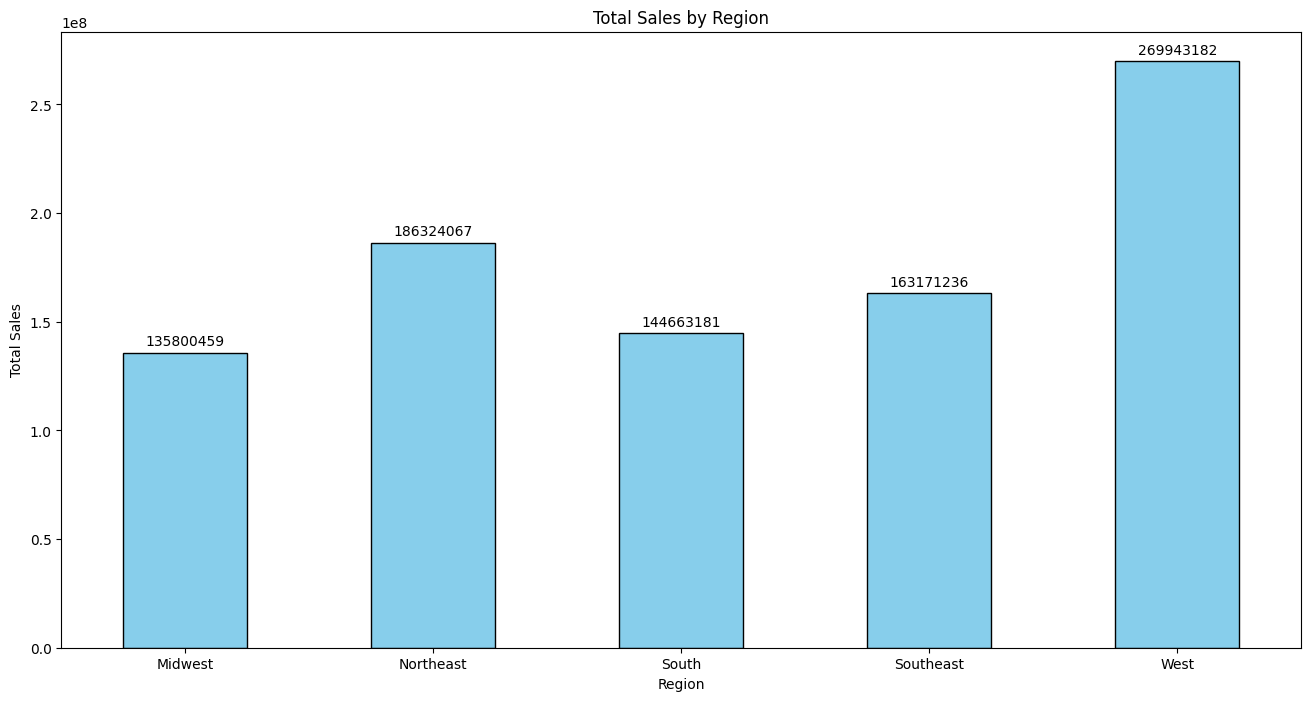

In [42]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total sales revenue for each region is as follows: The **Midwest** generated **$135 800 459**, while the **Northeast** achieved **$186 324 067**. The **South** accumulated **$144 663 181** in sales revenue and the **Southeast** reached **$163 171 236**. The **West** leads with the highest revenue, totaling **$269 943 182**.

<br>


### 9. How does sales revenue vary by product category?

In [45]:
df.groupby('Category')['Total Sales'].sum()

Category
Apparel              302767492.0
Athletic Footwear    260305576.0
Street Footwear      336829057.0
Name: Total Sales, dtype: float64

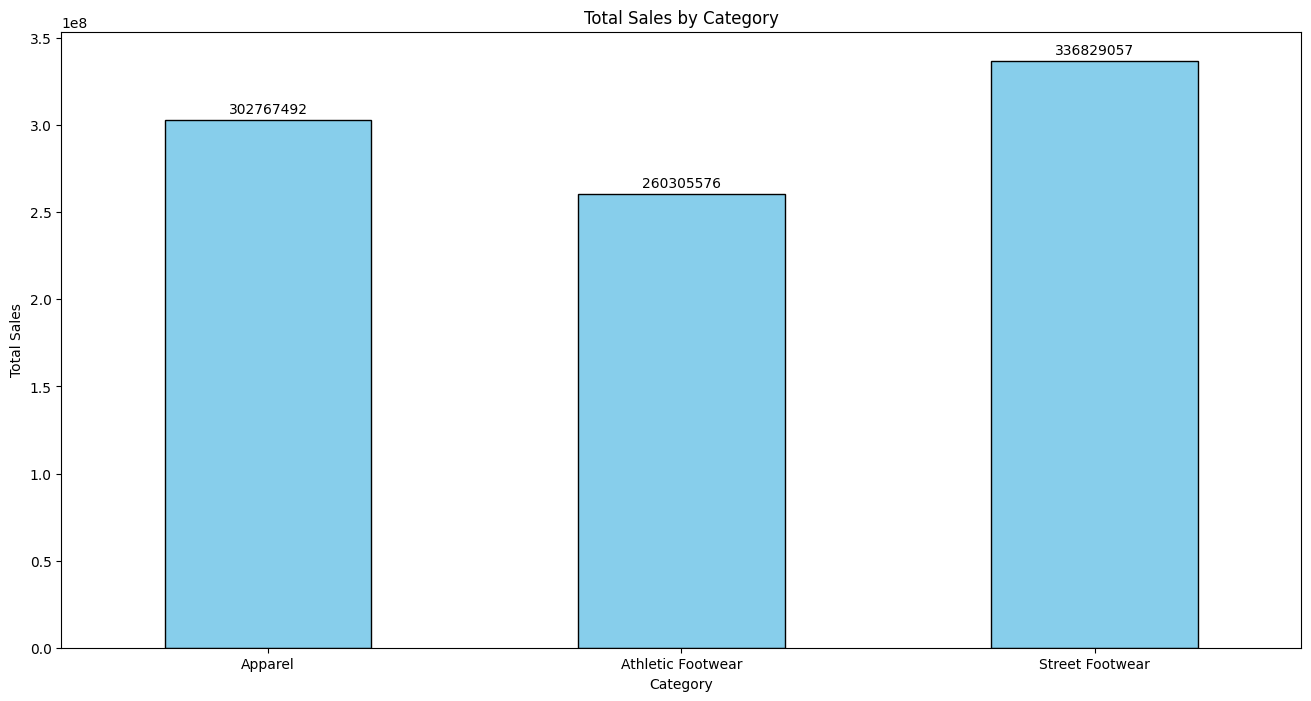

In [47]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

Sales revenue varies significantly by product category. **Street Footwear** leads with the highest revenue, totaling **$336 829 057**. This is followed by **Apparel**, which generated **$302 767 492** in revenue. **Athletic Footwear** comes in third, with a total revenue of **$260 305 576**.

<br>


### 10. What are the top three cities in terms of total sales?

In [48]:
df.groupby('City')['Total Sales'].sum().nlargest(3)

City
Charleston       39974797.0
New York         39801235.0
San Francisco    34539220.0
Name: Total Sales, dtype: float64

The top three cities in terms of total sales are **Charleston** with **$39 974 797**, **New York** with **$39 801 235** and **San Francisco** with **$34 539 220**.

<br>


### 11. Which region contributes the most to profit?

In [50]:
df.groupby('Region')['Operating Profit'].sum()

Region
Midwest      52811346.48
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
West         89609406.55
Name: Operating Profit, dtype: float64

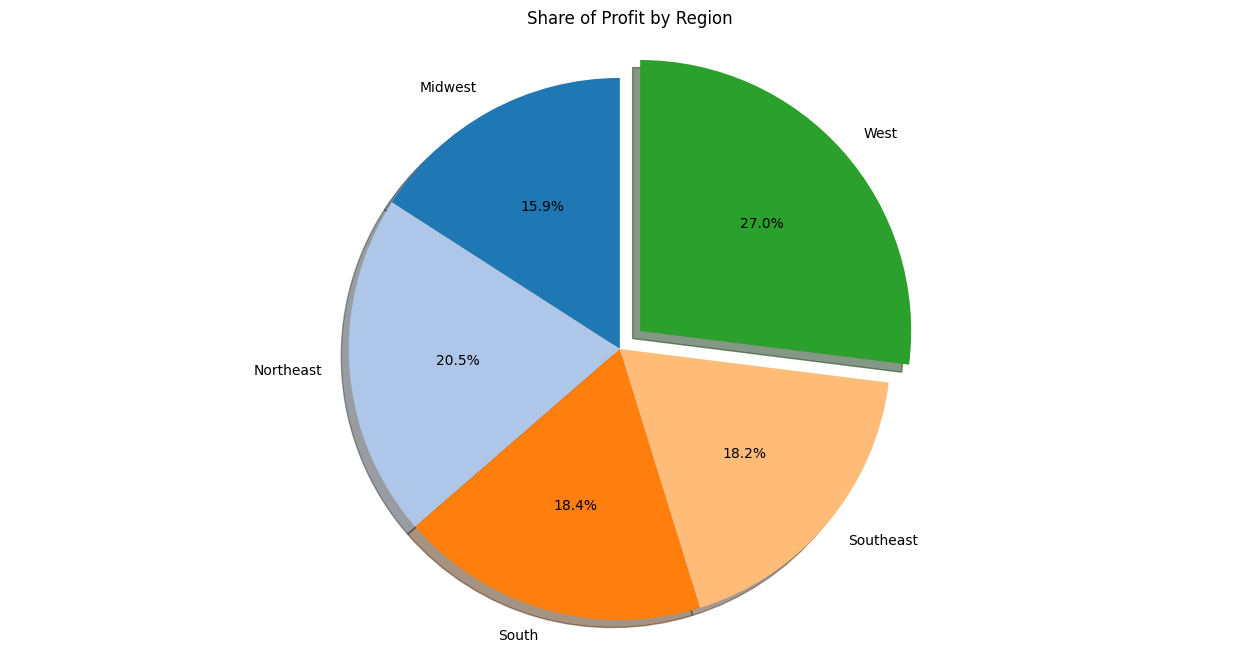

In [51]:
profit_by_region = df.groupby('Region')['Operating Profit'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
explode_index = profit_by_region.idxmax()
explode = [0.1 if retailer == explode_index else 0 for retailer in profit_by_region.index]
colors = plt.get_cmap('tab20').colors
ax.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=colors[:len(total_sales_by_retailer)])
ax.axis('equal')
ax.set_title('Share of Profit by Region')
plt.show()

In the total profit from the sale of Adidas products in the analyzed dataset, the largest share belongs to the **West** region with a total of **$89 609 406.55** which represents **27%** of the total profit.

<br>

### 12. What is the percentage of sales generated by men's products vs. women's products?

In [54]:
gender_sales = df.groupby('Gender')['Total Sales'].sum()
total_sales = gender_sales.sum()

men_sales_percentage = (gender_sales['Men'] / total_sales) * 100
women_sales_percentage = (gender_sales['Women'] / total_sales) * 100

men_sales_percentage, women_sales_percentage
print(f"Men's sales percentage: {men_sales_percentage:.2f}%")
print(f"Women's sales percentage: {women_sales_percentage:.2f}%")

Men's sales percentage: 54.03%
Women's sales percentage: 45.97%


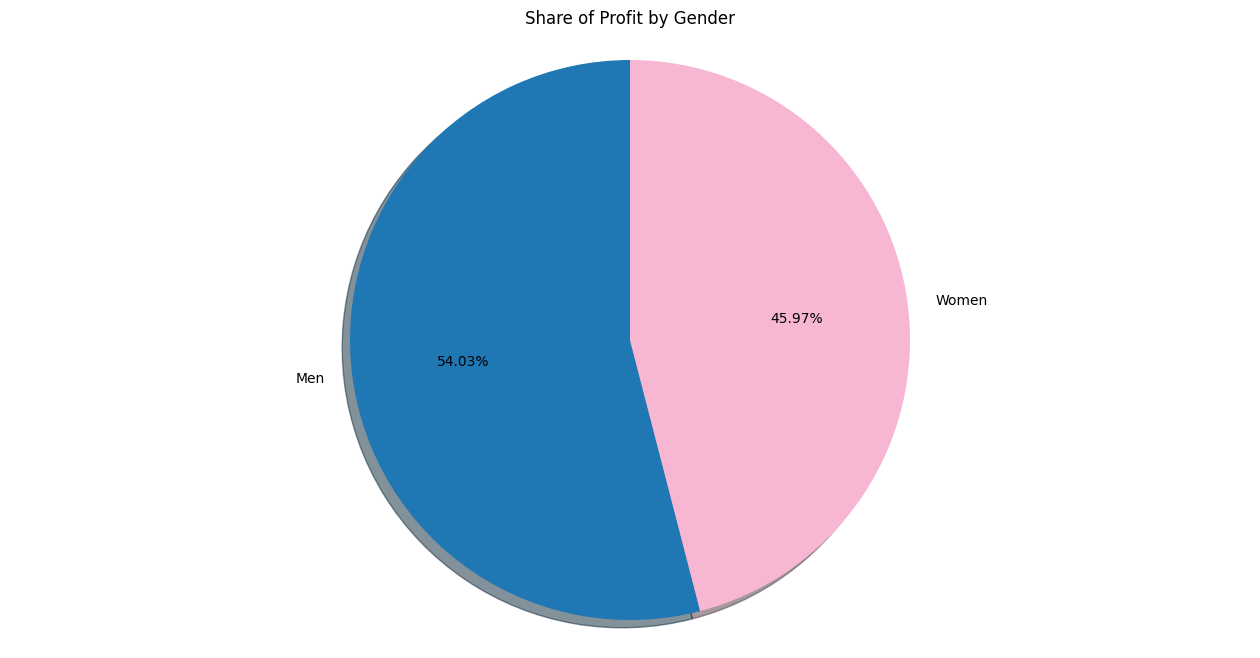

In [71]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]
ax.pie(gender_sales, labels=gender_sales.index, autopct='%1.2f%%', startangle=90, shadow=True, colors=colors)
ax.axis('equal')
ax.set_title('Share of Profit by Gender')
plt.show()

Men's products account for **54.03%** of the total sales, while women's products represent **45.97%**.

<br>

### 13. What is the trend in sales revenue over time?

In [74]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

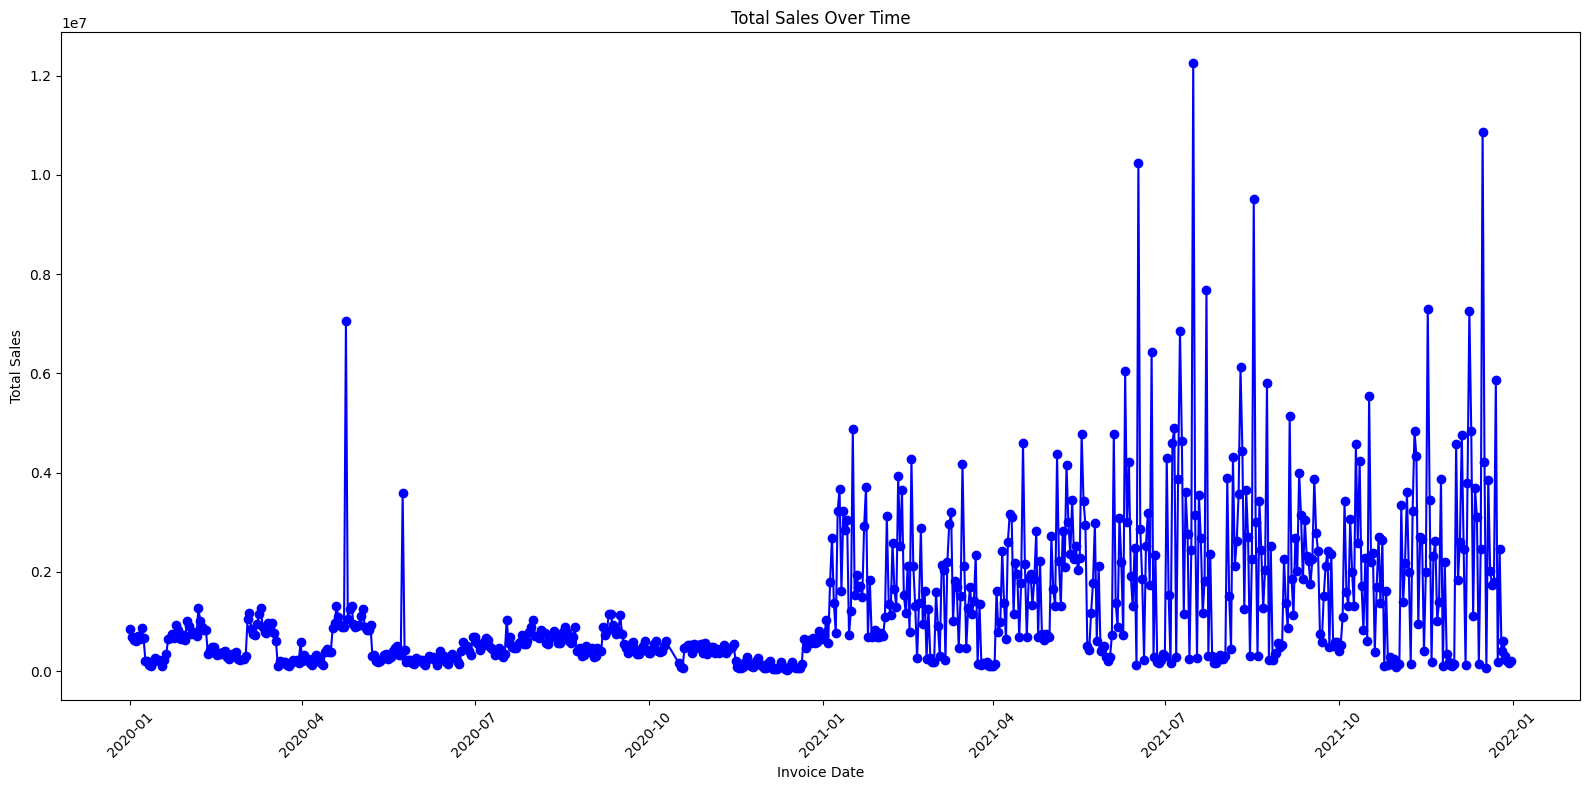

In [86]:
total_sales_date = df.groupby('Invoice Date')['Total Sales'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(total_sales_date.index, total_sales_date.values, marker='o', linestyle='-', color='b')
ax.set_title('Total Sales Over Time')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the provided graph, the **trend in sales revenue over time** shows several key patterns:

- **Early 2020 to mid-2020:** Sales remain relatively low and consistent with minor fluctuations. The total sales are fairly stable until around **April 2020**, where two sharp spikes in sales are observed. These spikes could indicate special events or promotions that caused temporary surges in revenue.
  
- **Mid-2020 to late 2020:** After these peaks, the sales return to a lower, stable level for a few months, with relatively little fluctuation until around **late 2020**. During this time, the revenue is steady, with smaller peaks compared to the earlier spikes.

- **Late 2020 to early 2021:** Around **November 2020**, a clear upward trend begins, and the sales data show a noticeable increase in both the frequency and magnitude of revenue spikes. This could be associated with the holiday season or the implementation of more successful sales strategies. This upward momentum continues into **2021**, where sales revenue becomes more volatile, with more frequent and higher peaks, indicating **increased sales activity**.

- **2021 to early 2022:** Sales volatility remains high, with multiple large spikes, suggesting the retailer experienced periods of **intense sales activity**, potentially due to marketing campaigns, new product launches, or seasonal demands. The overall trend during this period reflects **increased revenue and heightened market activity**.

In summary, **sales revenue exhibits a sharp rise in volatility and volume starting in late 2020**, indicating a period of growth and increased sales efforts. The **strong peaks in sales** suggest periodic promotions or events, while the overall upward trend implies a sustained growth in revenue over time.

<br>

### 14. What is the average total sales per retailer?

In [89]:
df.groupby('Retailer')['Total Sales'].mean().round(2)

Retailer
Amazon            81874.51
Foot Locker       83464.06
Kohl's            99140.54
Sports Direct     89798.72
Walmart          119102.89
West Gear        102343.86
Name: Total Sales, dtype: float64

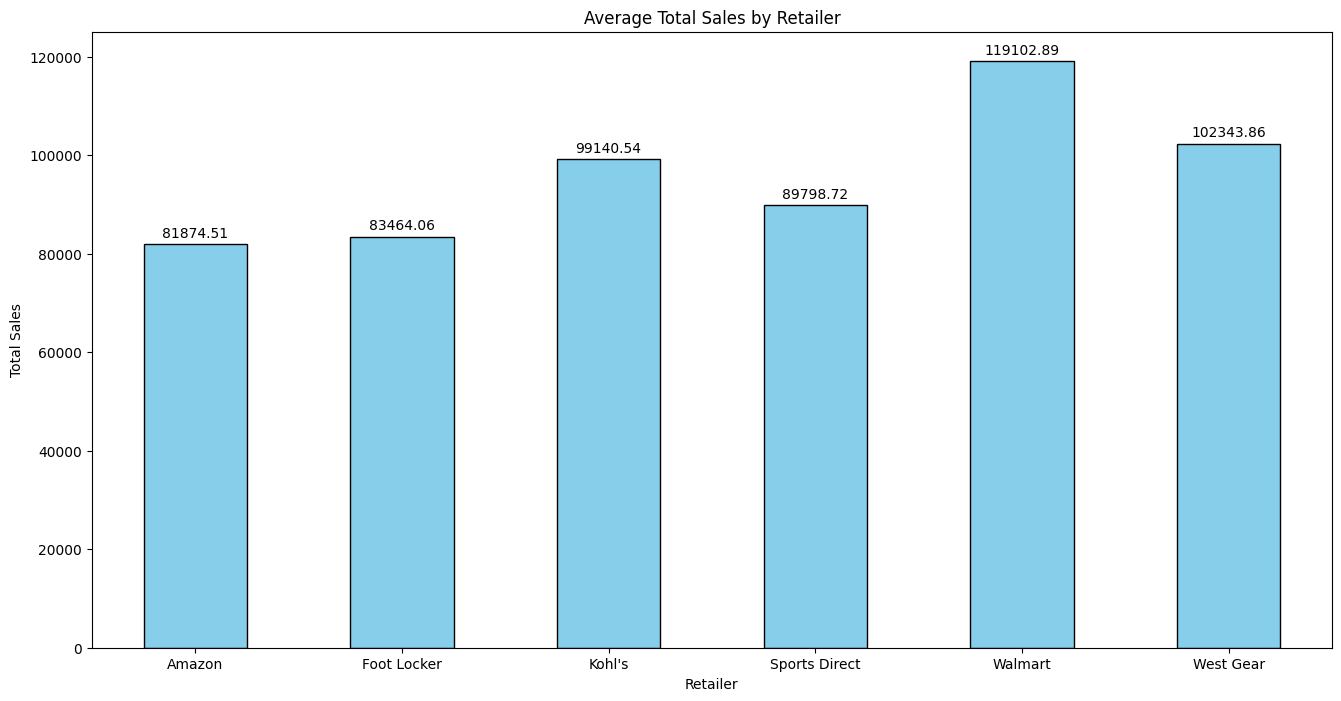

In [91]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Total Sales'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The average total sales figures are as follows: **Amazon** with **$81 874.51**, **Foot Locker** with **$83 464.06**, **Kohl's** with **$99 140.54**, **Sports Direct** with **$89 798.72**, **Walmart** with **$119 102.89** and **West Gear** with **$102 343.86**.

<br>


### 15. Which state generates the highest total sales?

In [94]:
df.groupby('State')['Total Sales'].sum().nlargest(1)

State
New York    64229039.0
Name: Total Sales, dtype: float64

Among the states listed, **New York** generates the highest total sales, amounting to **$64 229 039**. This figure highlights New York as the leading state in terms of total sales performance.

<br>

### 16. What is the distribution of sales across different sales methods (in-store vs. online)?

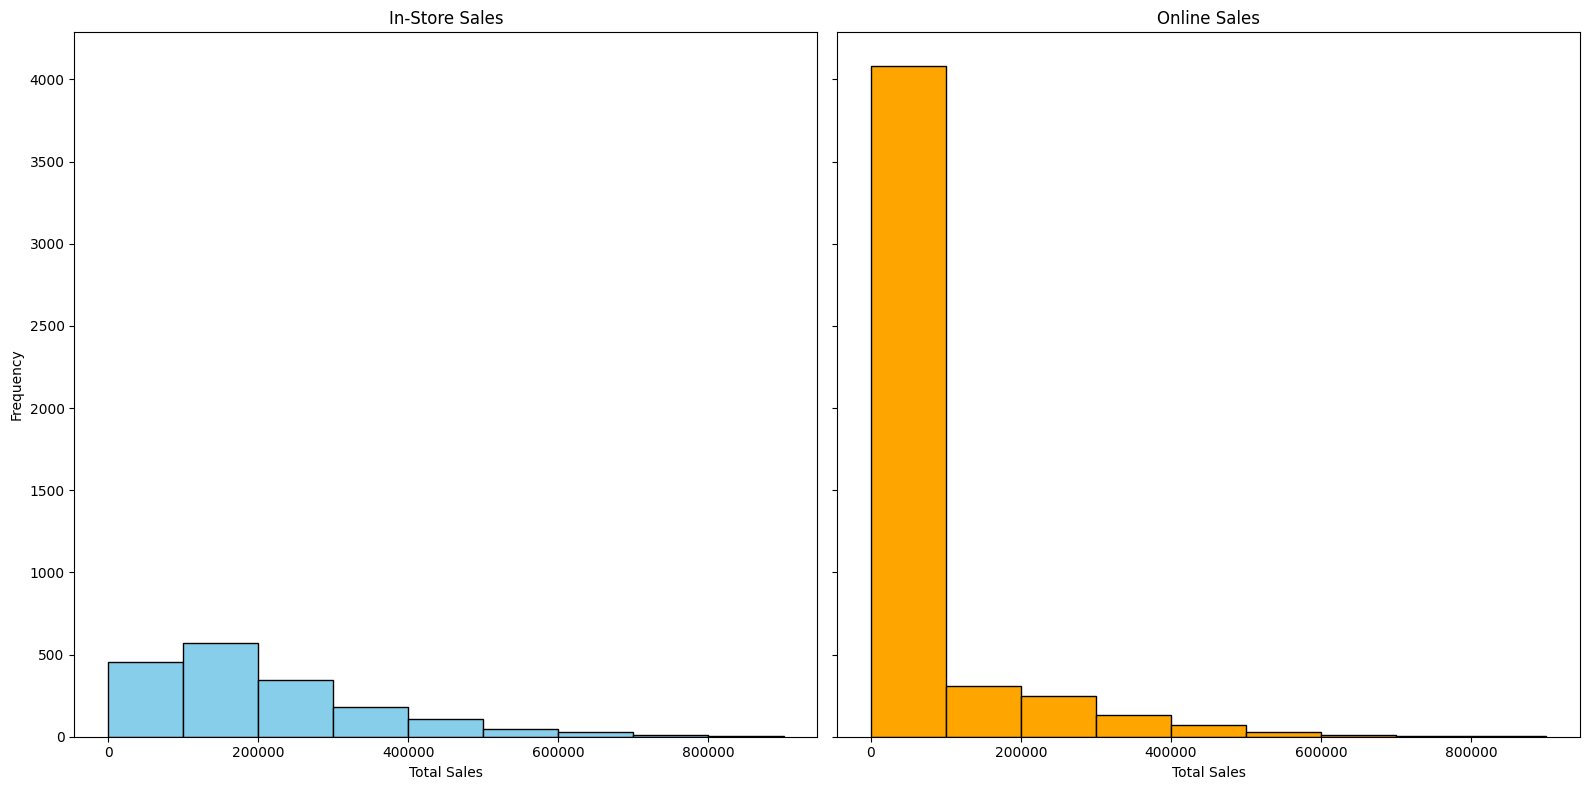

In [99]:
in_store_sales = df[df['Sales Method'] == 'In-store']['Total Sales']
online_sales = df[df['Sales Method'] == 'Online']['Total Sales']

max_sales = int(df['Total Sales'].max())
bins = list(range(0, max_sales + 100000, 100000))

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axes[0].hist(in_store_sales, bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('In-Store Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Frequency')

axes[1].hist(online_sales, bins=bins, color='orange', edgecolor='black')
axes[1].set_title('Online Sales')
axes[1].set_xlabel('Total Sales')

plt.tight_layout()
plt.show()

For **in-store sales** (left histogram), the distribution shows a wider range of total sales. The frequency of sales is highest in the lower ranges, specifically below $200,000, with a gradual decrease as the sales totals increase. There are fewer instances of in-store sales above $400,000, with some outliers reaching closer to $800,000. This suggests that while in-store sales are more frequent in the lower revenue brackets, some higher-value transactions do occur.

In contrast, the **online sales** (right histogram) exhibit a much more skewed distribution. The vast majority of online transactions fall within the very low sales range, predominantly under $200,000, with a sharp drop-off as sales totals increase. Very few transactions surpass the $200,000 mark, and only a handful of outliers extend towards $800,000. This indicates that online sales tend to be more concentrated in smaller amounts compared to in-store sales.

<br>

### 17. Which product category has the highest average operating margin?

In [103]:
df.groupby('Category')['Operating Margin'].mean().round(3)

Category
Apparel              0.427
Athletic Footwear    0.414
Street Footwear      0.428
Name: Operating Margin, dtype: float64

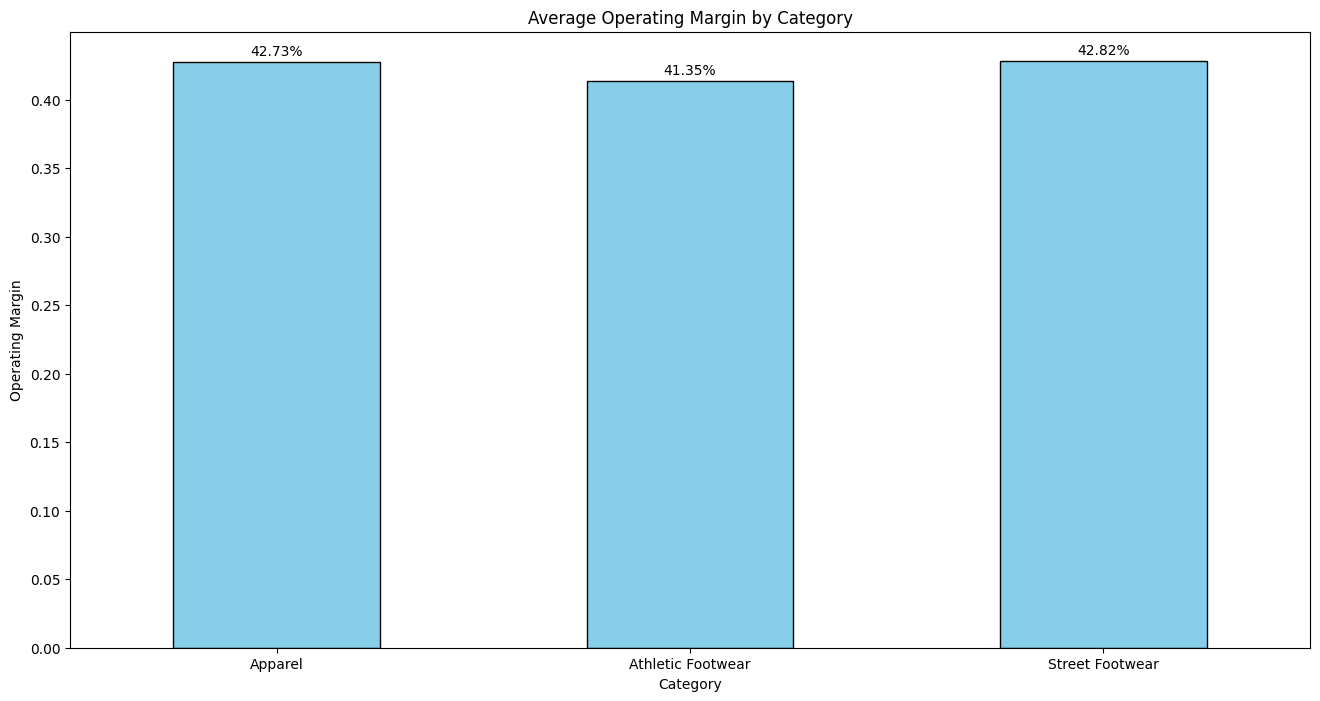

In [161]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Operating Margin'].mean().round(4).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Operating Margin by Category')
plt.xlabel('Category')
plt.ylabel('Operating Margin')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height() * 100:.2f}%',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The product category with the highest average operating margin is **Street Footwear**, with an average operating margin of **42.82%**.

<br>

### 18. What is the total number of units sold across all retailers?

In [112]:
df.groupby('Retailer')['Units Sold'].sum()

Retailer
Amazon           197990
Foot Locker      604369
Kohl's           287375
Sports Direct    557640
Walmart          206225
West Gear        625262
Name: Units Sold, dtype: int64

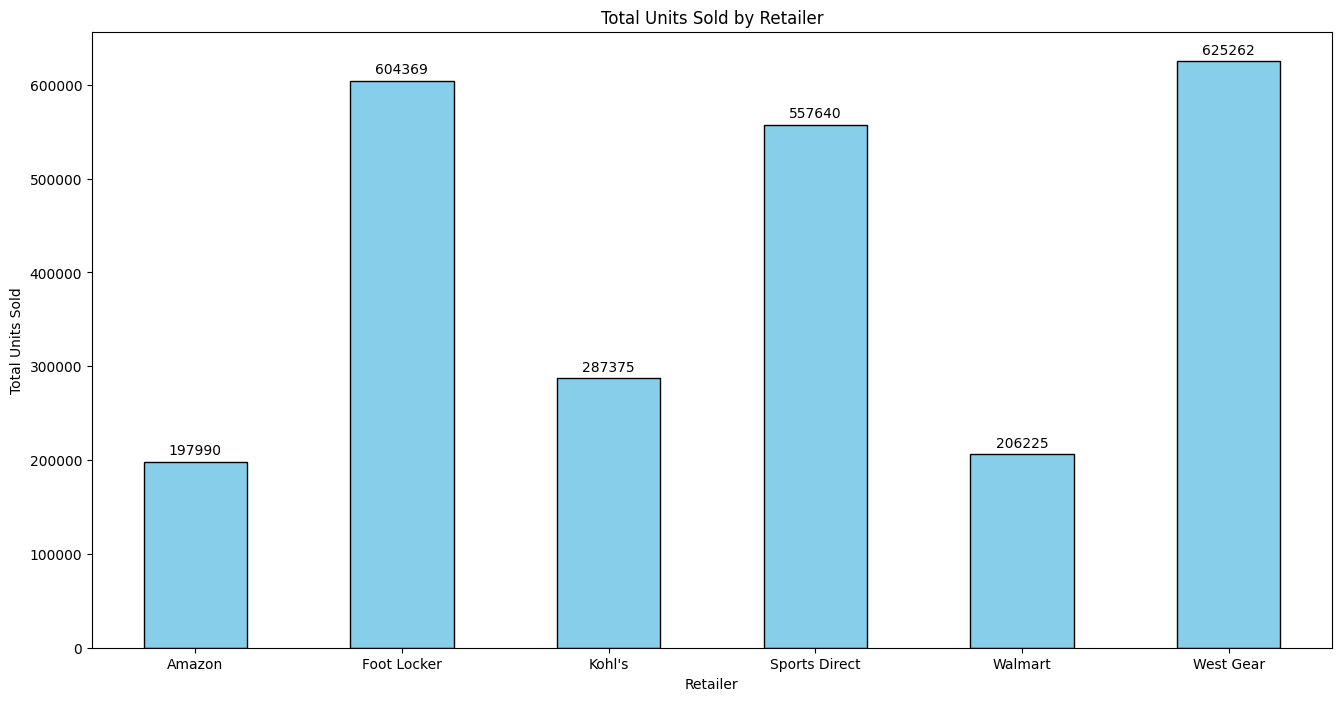

In [113]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Units Sold by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total number of units sold across all retailers is **2 478 861** units. This is the sum of units sold by Amazon (197 990), Foot Locker (604 369), Kohl's (287 375), Sports Direct (557 640), Walmart (206 225), and West Gear (625 262).

<br>

### 19. How does total sales compare between footwear and apparel?

In [122]:
apparel_sales = df[df['Category'] == 'Apparel']['Total Sales'].sum()
footwear_sales = df[df['Category'] != 'Apparel']['Total Sales'].sum()

print(f"The total sales for apparel is {apparel_sales:.0f} and for footwear is {footwear_sales:.0f}.")

The total sales for apparel is 302767492 and for footwear is 597134633.


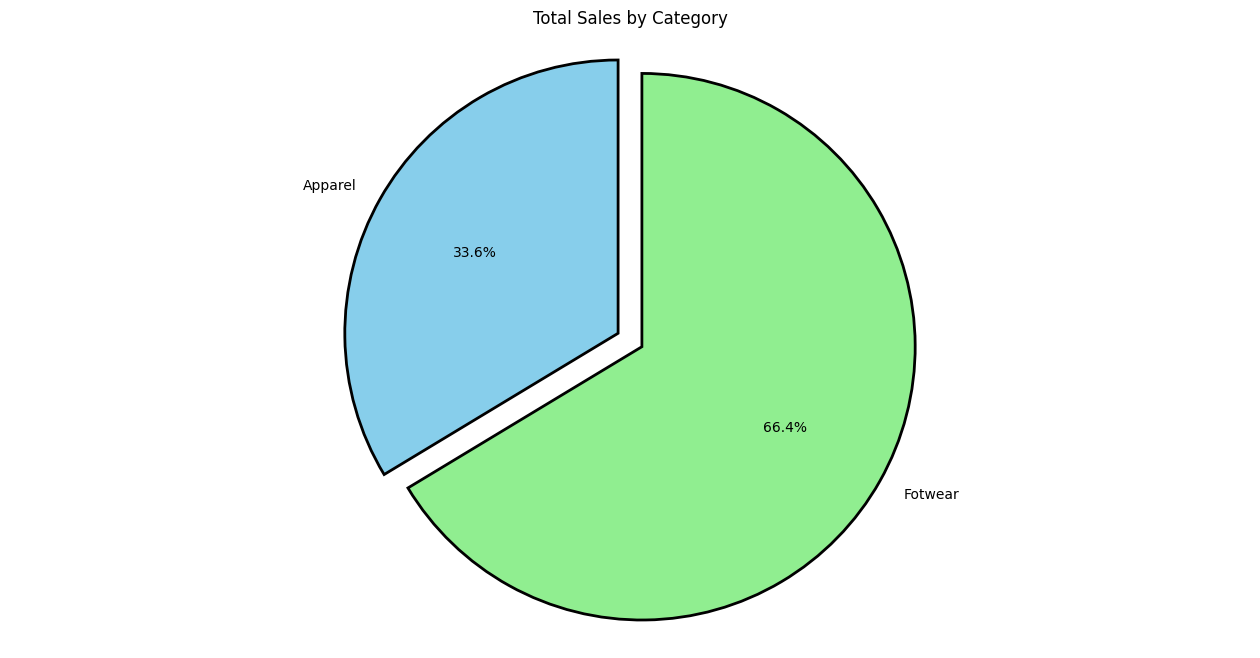

In [124]:
labels = ['Apparel', 'Fotwear']
sizes = [apparel_sales, footwear_sales]
colors = ['skyblue', 'lightgreen']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(16, 8))
ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
ax.axis('equal')
ax.set_title('Total Sales by Category')

plt.show()

The total sales for **footwear** significantly exceed those for **apparel**. Footwear generated **$597 134 633**, while apparel contributed **$302 767 492**. This indicates that footwear sales are nearly double the sales of apparel, highlighting footwear as the stronger revenue driver between the two categories.

<br>

### 20. What is the highest total sales recorded for a single invoice?

In [134]:
df[df['Total Sales'] == df['Total Sales'].max()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Category
1394,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,110.0,750,825000.0,371250.0,0.45,In-store,Women,Apparel
1970,West Gear,1128299,2021-06-17,South,Louisiana,New Orleans,Women's Apparel,110.0,750,825000.0,288750.0,0.35,Online,Women,Apparel


The highest total sales recorded for a single invoice is **$825 000**.

<br>

### 21. How many unique products are sold across all retailers?

In [135]:
df.groupby('Retailer')['Product'].nunique()

Retailer
Amazon           6
Foot Locker      6
Kohl's           6
Sports Direct    6
Walmart          6
West Gear        6
Name: Product, dtype: int64

There are **6 unique products** sold across all retailers, as each retailer offers the same set of products.

<br>

### 22. What is the most profitable region in terms of profit?

In [138]:
df.groupby('Region')['Operating Profit'].sum()

Region
Midwest      52811346.48
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
West         89609406.55
Name: Operating Profit, dtype: float64

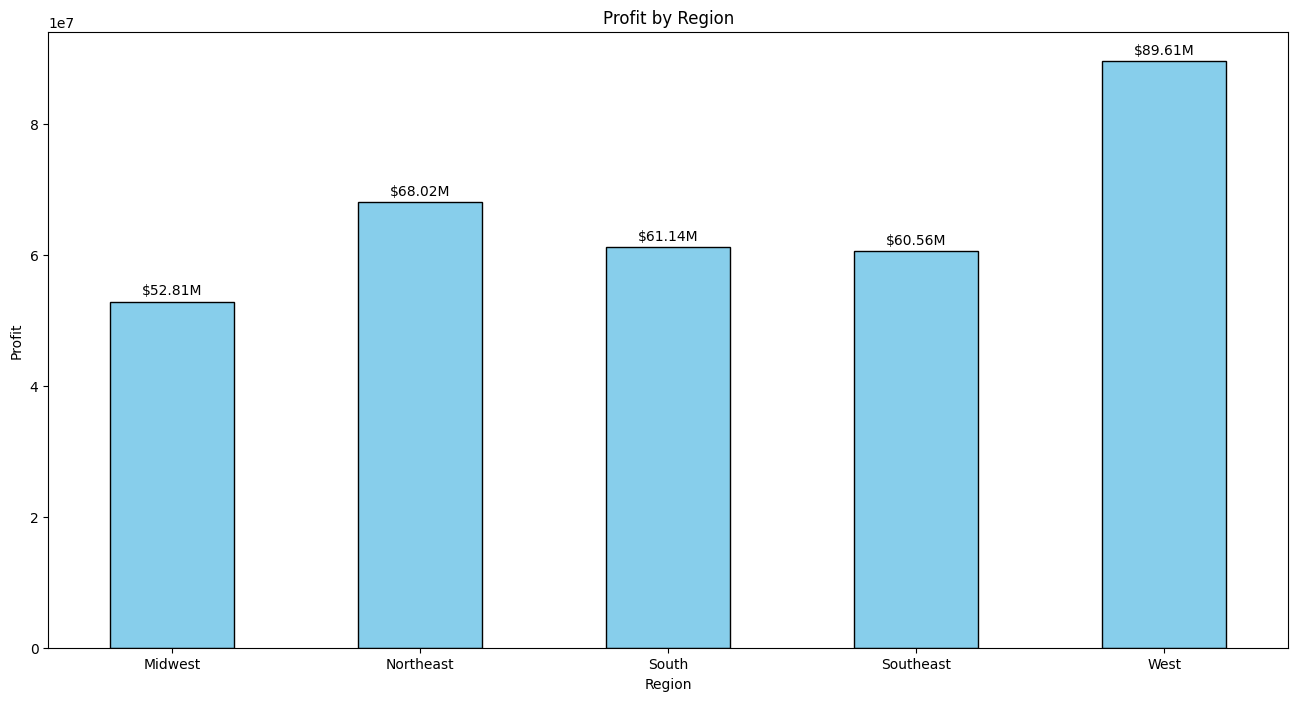

In [141]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The most profitable region in terms of profit is the **West**, with a total profit of **$89 609 406.55**.

<br>

### 23. What is the total number of invoices for each retailer?

In [147]:
df['Retailer'].value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

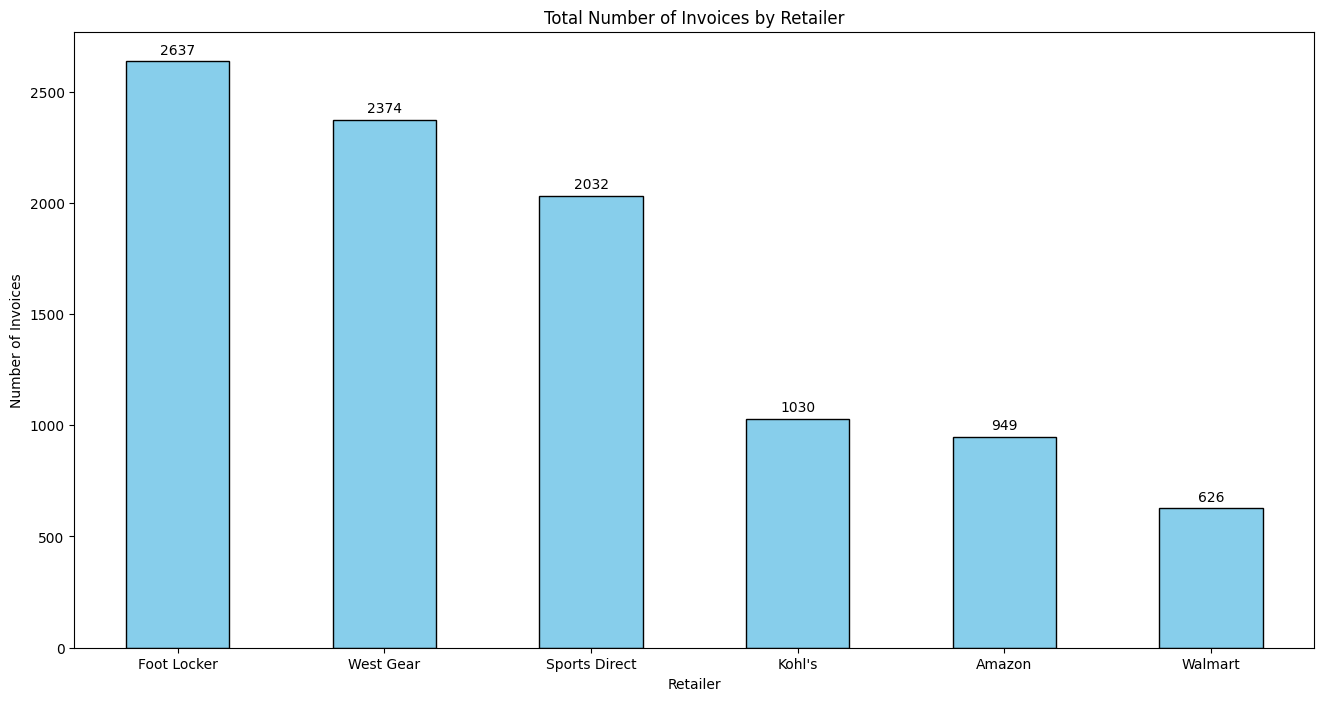

In [148]:
plt.figure(figsize=(16, 8))
bars = df['Retailer'].value_counts().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Number of Invoices by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total number of invoices for each retailer is as follows: **Foot Locker** has **2 637 invoices**, **West Gear** has **2 374**, **Sports Direct** has **2 032**, **Kohl's** has **1 030**, **Amazon** has **949**, and **Walmart** has **626** invoices.

<br>

### 24. What is the overall percentage contribution of each product category to total sales?

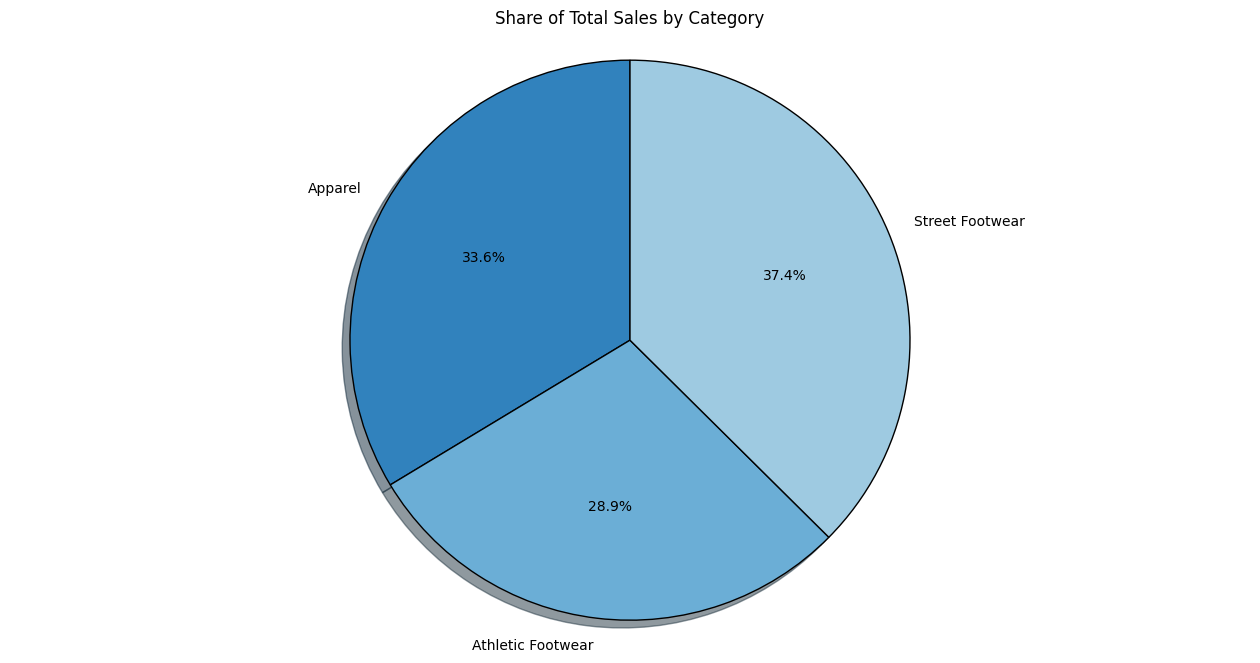

In [155]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = plt.get_cmap('tab20c').colors
ax.pie(df.groupby('Category')['Total Sales'].sum(), labels=df.groupby('Category')['Total Sales'].sum().index, autopct='%1.1f%%', startangle=90, shadow=True, colors=colors[:len(total_sales_by_retailer)], wedgeprops={'edgecolor': 'black'})
ax.axis('equal')
ax.set_title('Share of Total Sales by Category')
plt.show()

The largest contributor is **Street Footwear**, which accounts for **37.4%** of the total sales. This is followed by **Apparel**, contributing **33.6%**, and **Athletic Footwear**, making up **28.9%** of the total sales. These proportions show that Street Footwear has the largest share, followed by Apparel, with Athletic Footwear contributing the smallest share among the three categories.

<br>

## Profit and Margin Analysis

### 25. What is the total operating profit generated across all retailers?

In [156]:
df.groupby('Retailer')['Operating Profit'].sum()

Retailer
Amazon           28818503.31
Foot Locker      80722124.81
Kohl's           36811252.58
Sports Direct    74332954.96
Walmart          25782052.61
West Gear        85667873.18
Name: Operating Profit, dtype: float64

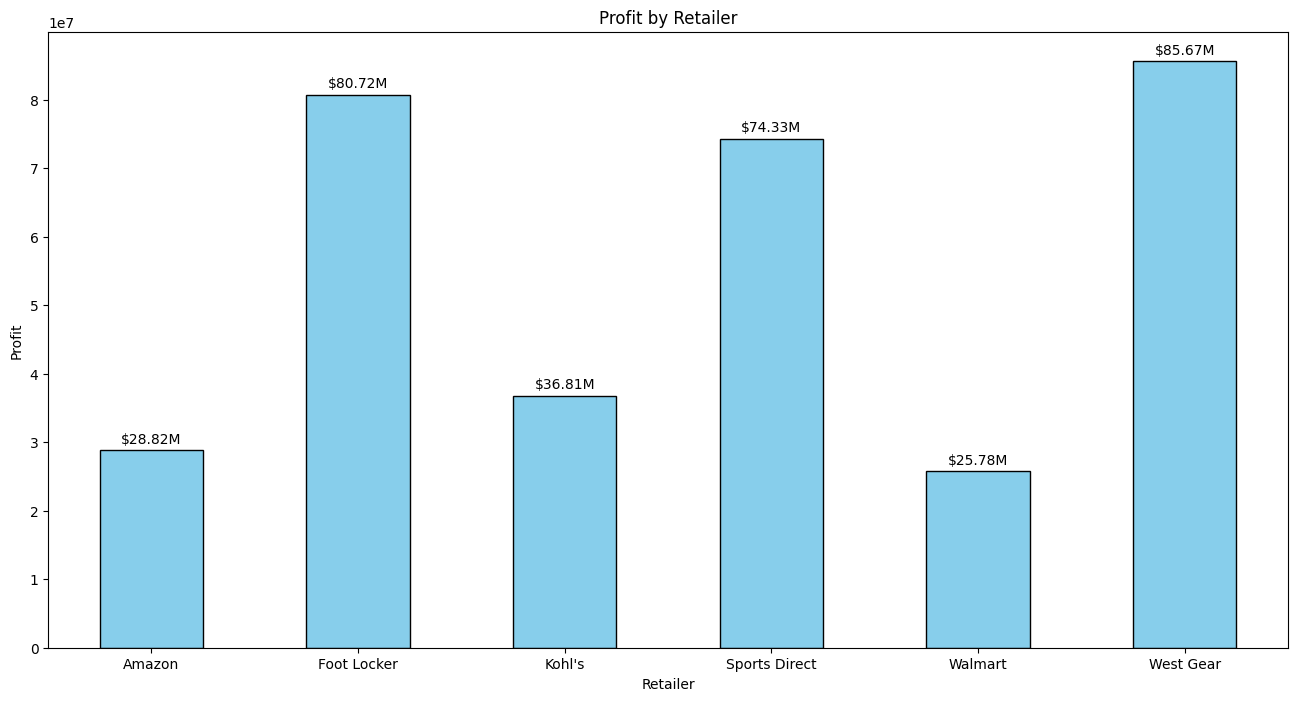

In [157]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The total operating profit generated across all retailers is **$332,934,761.45**. This is the sum of the operating profits from Amazon ($28,818,503.31), Foot Locker ($80,722,124.81), Kohl's ($36,811,252.58), Sports Direct ($74,332,954.96), Walmart ($25,782,052.61), and West Gear ($85,667,873.18).

<br>

### 26. Which retailer has the highest total operating profit?

In [158]:
df.groupby('Retailer')['Operating Profit'].sum().nlargest(1)

Retailer
West Gear    85667873.18
Name: Operating Profit, dtype: float64

The retailer with the highest total operating profit is **West Gear**, with an operating profit of **$85,667,873.18**.

<br>

### 27. What is the average operating margin for each product category?

In [159]:
df.groupby('Category')['Operating Margin'].mean().round(3)

Category
Apparel              0.427
Athletic Footwear    0.414
Street Footwear      0.428
Name: Operating Margin, dtype: float64

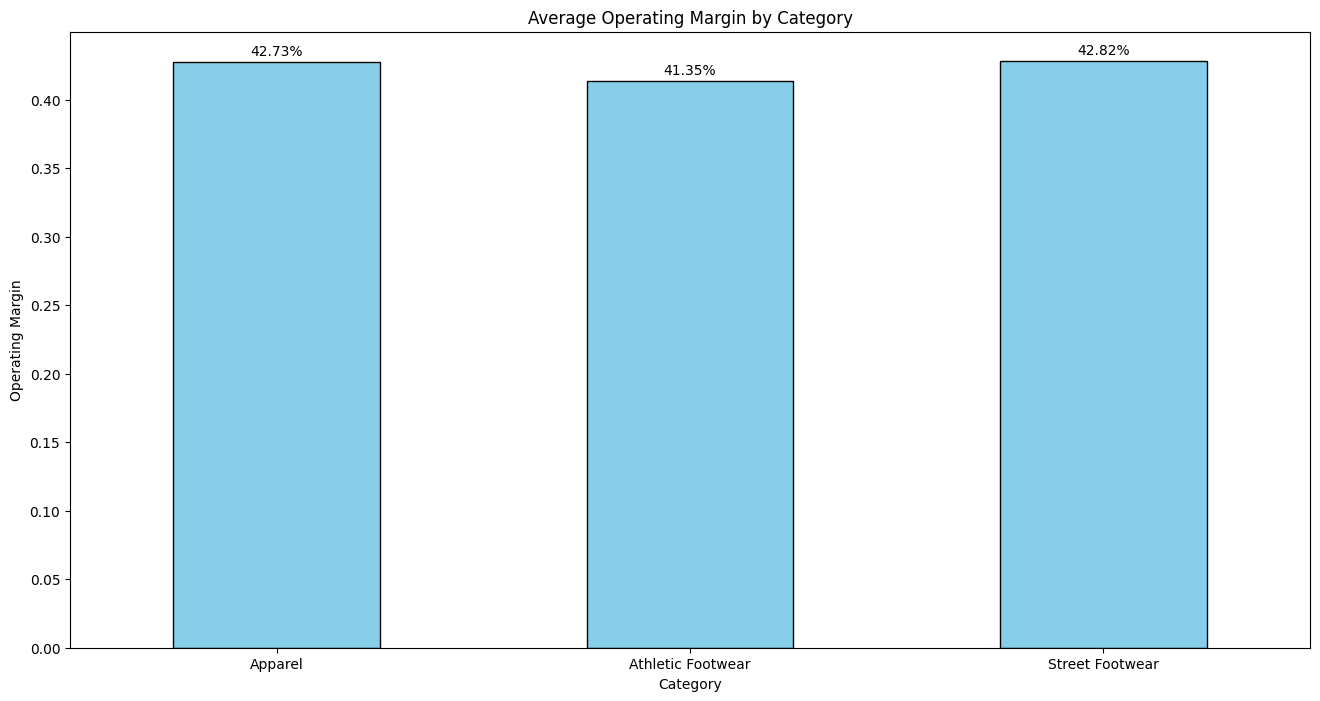

In [160]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Operating Margin'].mean().round(4).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Operating Margin by Category')
plt.xlabel('Category')
plt.ylabel('Operating Margin')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height() * 100:.2f}%',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The average operating margin for each product category is **42.7%** for **apparel**, **41.4%** for **athletic footwear** and **42.8%** for **street footwear**. This indicates that street footwear has the highest average operating margin, followed closely by apparel, with athletic footwear having the lowest margin.

<br>

### 28. How does operating profit vary by sales method?

In [162]:
df.groupby('Sales Method')['Operating Profit'].sum()

Sales Method
In-store    1.275913e+08
Online      9.655518e+07
Outlet      1.079883e+08
Name: Operating Profit, dtype: float64

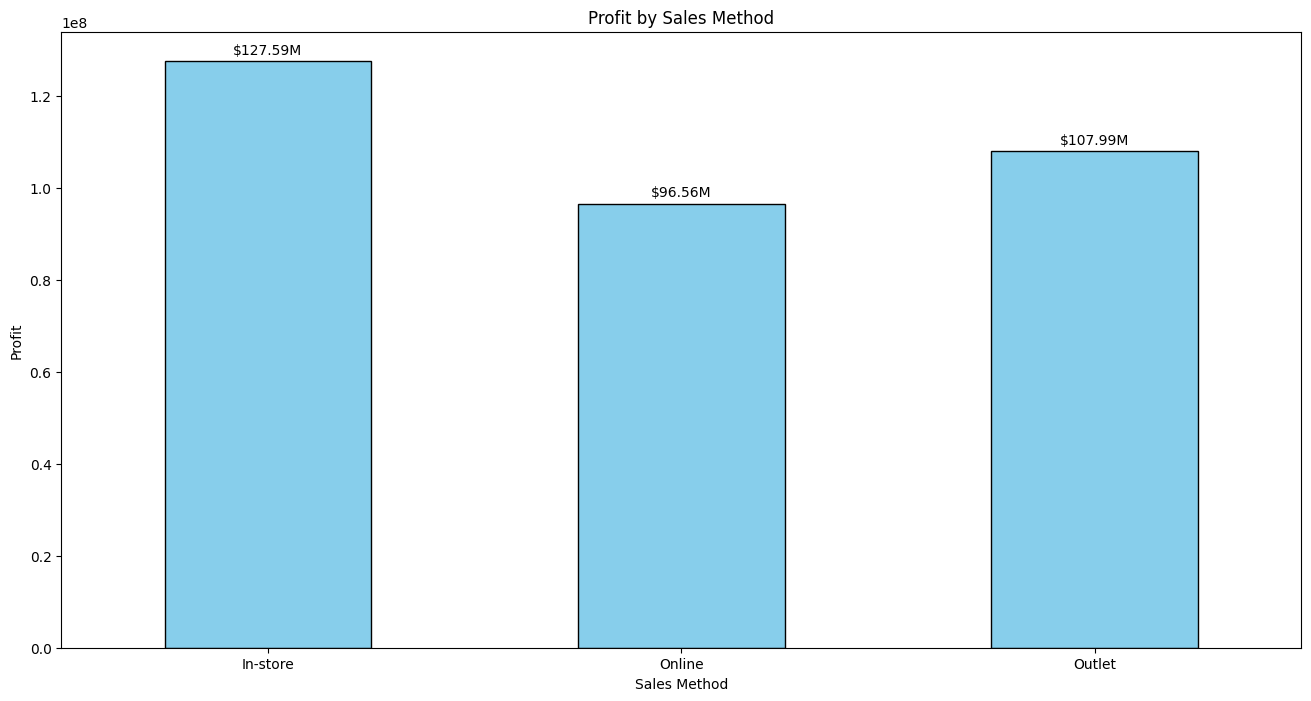

In [163]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Sales Method')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

Operating profit varies significantly by sales method. **In-store sales** generate the highest operating profit, amounting to **$127.59 million**, followed by **outlet sales** with a profit of **$107.99 million**. **Online sales** contribute the lowest operating profit, totaling **$96.56 million**. This indicates that traditional in-store and outlet sales are more profitable compared to online sales.

<br>

### 29. What is the highest operating margin recorded for a single transaction?

In [166]:
df[df['Operating Margin'] == df['Operating Margin'].max()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Category
5005,Sports Direct,1197831,2021-09-11,South,Alabama,Birmingham,Women's Apparel,56.0,240,13440.0,10752.0,0.8,Online,Women,Apparel
5035,Sports Direct,1197831,2021-10-11,South,Alabama,Birmingham,Women's Apparel,68.0,203,13804.0,11043.2,0.8,Online,Women,Apparel


The highest operating margin recorded for a single transaction is **80%**.

<br>

### 30. How does the operating profit differ across different states?

In [167]:
df.groupby('State')['Operating Profit'].sum()

State
Alabama            9147581.39
Alaska             4498345.86
Arizona            5344664.58
Arkansas           4915697.91
California        19301170.40
Colorado           7713555.83
Connecticut        4152320.79
Delaware           4524350.06
Florida           20926206.92
Georgia            6893289.61
Hawaii             5849794.07
Idaho              8121115.10
Illinois           3920368.61
Indiana            3379256.00
Iowa               2655217.37
Kansas             3510147.29
Kentucky           3935830.23
Louisiana          9417233.49
Maine              3187654.37
Maryland           2757642.12
Massachusetts      3353875.87
Michigan           8135894.02
Minnesota          2670229.76
Mississippi        6369094.73
Missouri           3907209.36
Montana            6232037.55
Nebraska           2439478.41
Nevada             7060651.92
New Hampshire      5786206.43
New Jersey         3657237.22
New Mexico         6738060.41
New York          23329824.07
North Carolina     9756422.87
Nort

In [ ]:
grouped_df

In [187]:
import plotly.express as px

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

grouped_df['State Code'] = grouped_df['State'].map(state_abbrev)

fig = px.choropleth(grouped_df,
                    locations='State Code',  
                    locationmode="USA-states",  
                    color='Operating Profit', 
                    color_continuous_scale="Blues", 
                    scope="usa",  
                    labels={'Operating Profit': 'Profit ($)'},  
                    title="Profit by State")

fig.show()

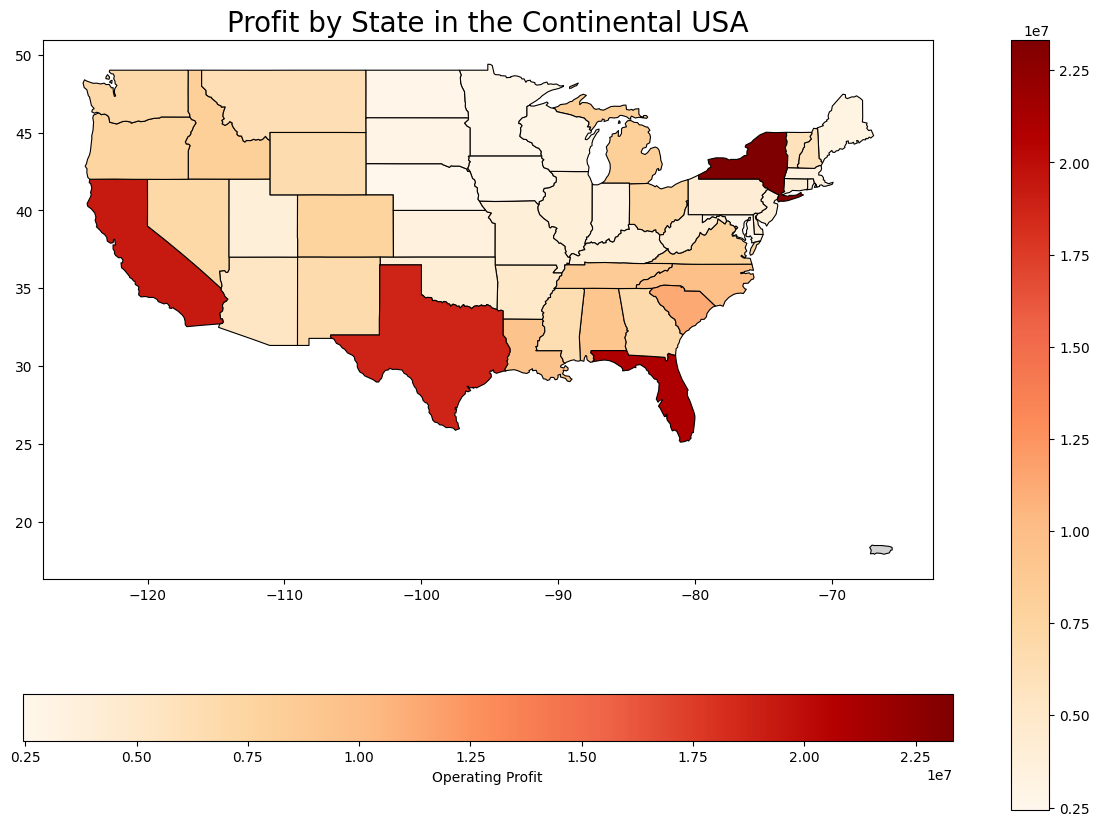

In [191]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl


url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states = gpd.read_file(url)

states['name'] = states['name'].str.title()

grouped_df['State'] = grouped_df['State'].str.title()


states = states[~states['name'].isin(['Alaska', 'Hawaii'])]

states = states.merge(grouped_df, how='left', left_on='name', right_on='State')

missing_color = 'lightgrey'
vmin, vmax = grouped_df['Operating Profit'].min(), grouped_df['Operating Profit'].max()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

states.plot(column='Operating Profit', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.8,
            missing_kwds={'color': missing_color, 'label': 'No data'}, vmin=vmin, vmax=vmax)

cbar = plt.cm.ScalarMappable(cmap='OrRd', norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
cbar.set_array([])

fig.colorbar(cbar, ax=ax, orientation="horizontal", label="Operating Profit")

plt.title('Profit by State in the Continental USA', fontsize=20)

plt.show()
